In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [25]:
import warnings
import os, shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import optimizers

# **1-Load Data**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Copying images to training, validation, and test directories
    </font>
</div>

In [3]:
# Original dataset path
origial_dataset_dir = '/kaggle/input/dogs-vs-cats/train/train'
# directory to copy data into it
base_dir = '/kaggle/working/'

In [4]:
# Create train, validation and test folder
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Create folders
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [5]:
# Createt cats and dogs folder in each recent folders
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

In [6]:
# Copy 1000 cats image to train/cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dts)

# Copy 500 cats image to validatinon/cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dts)

# Copy 500 cats image to test/cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dts)

In [7]:
# Copy 1000 dogs image to train/cats
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dts)

# Copy 500 dogs image to validatinon/cats
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dts)

# Copy 500 dogs image to test/cats
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames :
    src = os.path.join(origial_dataset_dir, fname)
    dts = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dts)

In [8]:
# Counts number of images in each folder
print('Total training cat images : ', len(os.listdir(train_cats_dir)))
print('Total validation cat images : ', len(os.listdir(validation_cats_dir)))
print('Total test cat images : ', len(os.listdir(test_cats_dir)))
print('_' * 45)
print('Total training dog images : ', len(os.listdir(train_dogs_dir)))
print('Total validation dog images : ', len(os.listdir(validation_dogs_dir)))
print('Total test dog images : ', len(os.listdir(test_dogs_dir)))

Total training cat images :  1000
Total validation cat images :  500
Total test cat images :  500
_____________________________________________
Total training dog images :  1000
Total validation dog images :  500
Total test dog images :  500


# **2-Building the model**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Instantiating a small convnet for dogs vs. cats classification
    </font>
</div>

In [9]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Configuring the model for training
    </font>
</div>

In [11]:
model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

# **3-Data preprocessing**

In [23]:
train_dataset = image_dataset_from_directory(
    '/kaggle/working/train',
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    '/kaggle/working/validation',
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    '/kaggle/working/test',
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [26]:
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [27]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [28]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [29]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Displaying the shapes of the data and labels yielded by the Dataset
    </font>
</div>

In [30]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Fitting the model using a Dataset
    </font>
</div>

In [32]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch.keras", save_best_only=True, monitor="val_loss")]

history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset,callbacks=callbacks)

Epoch 1/30


I0000 00:00:1731674384.445611      96 service.cc:145] XLA service 0x7e08f800a960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731674384.445682      96 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731674384.445688      96 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 4/63 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4603 - loss: 0.7275

I0000 00:00:1731674389.658871      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - accuracy: 0.5012 - loss: 0.7019 - val_accuracy: 0.6320 - val_loss: 0.6924
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5433 - loss: 0.6941 - val_accuracy: 0.6400 - val_loss: 0.6755
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.5791 - loss: 0.6778 - val_accuracy: 0.5840 - val_loss: 0.7251
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6428 - loss: 0.6335 - val_accuracy: 0.6130 - val_loss: 0.6714
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6521 - loss: 0.6068 - val_accuracy: 0.6480 - val_loss: 0.6901
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.6980 - loss: 0.5843 - val_accuracy: 0.6080 - val_loss: 1.1017
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.7311 - loss: 0.5716 - val_accuracy: 0.7210 - val_loss: 0.5520
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7360 - loss: 0.5215 - val_accuracy: 0.7100 - val_loss: 

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Displaying curves of loss and accuracy during training
    </font>
</div>

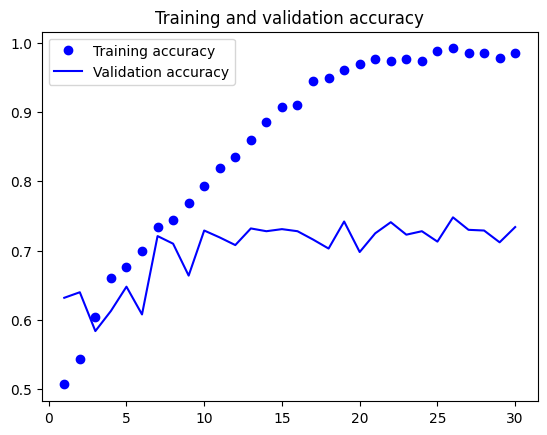

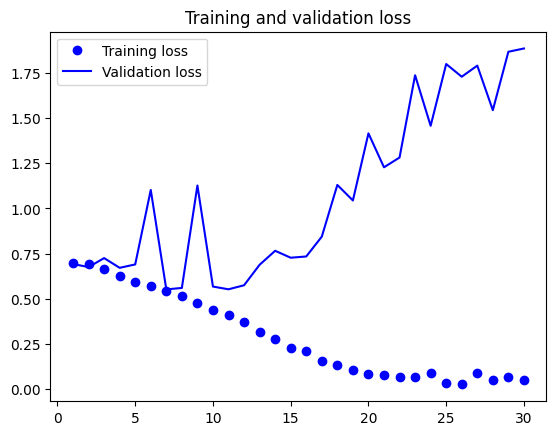

In [33]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Evaluating the model on the test set
    </font>
</div>

In [34]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6909 - loss: 0.6084
Test accuracy: 0.705


# **4-Using data augmentation**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Define a data augmentation stage to add to an image model
    </font>
</div>

In [35]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Displaying some randomly augmented training images
    </font>
</div>

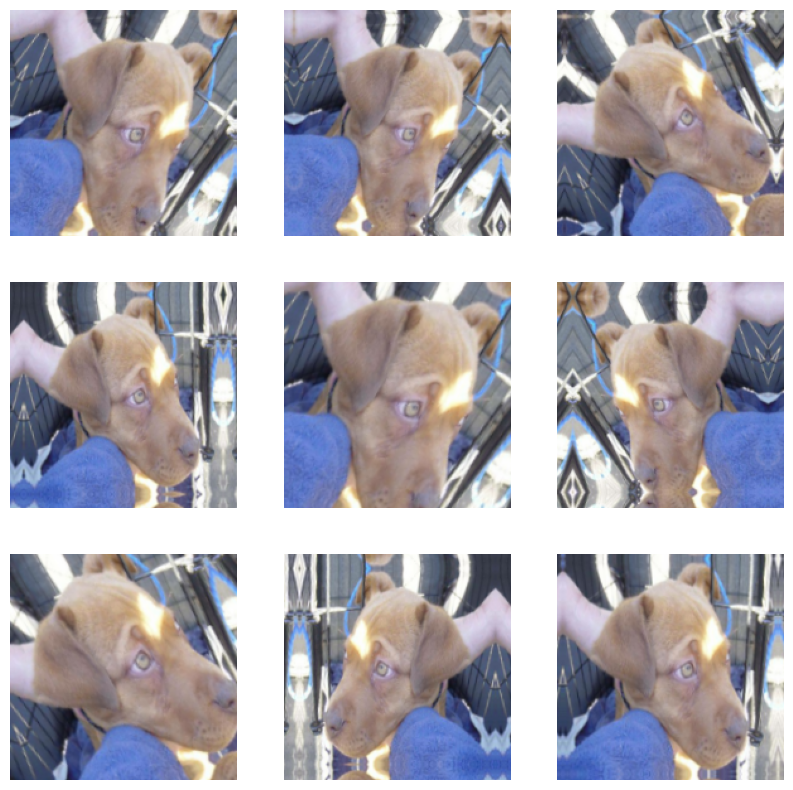

In [37]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Defining a new convnet that includes image augmentation and dropout
    </font>
</div>

In [38]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Training the regularized convnet
    </font>
</div>

In [39]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.4887 - loss: 0.7100 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4897 - loss: 0.6945 - val_accuracy: 0.6180 - val_loss: 0.6903
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5608 - loss: 0.6904 - val_accuracy: 0.5030 - val_loss: 0.6842
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.5703 - loss: 0.6783 - val_accuracy: 0.6600 - val_loss: 0.6424
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6114 - loss: 0.6573 - val_accuracy: 0.6540 - val_loss: 0.6164
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6503 - loss: 0.6232 - val_accuracy: 0.6710 - val_loss: 0.6096
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6691 - loss: 0.6081 - val_accuracy: 0.6700 - val_loss: 0.6362
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6887 - loss: 0.6140 - val_accuracy: 0.

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Displaying curves of loss and accuracy during training
    </font>
</div>

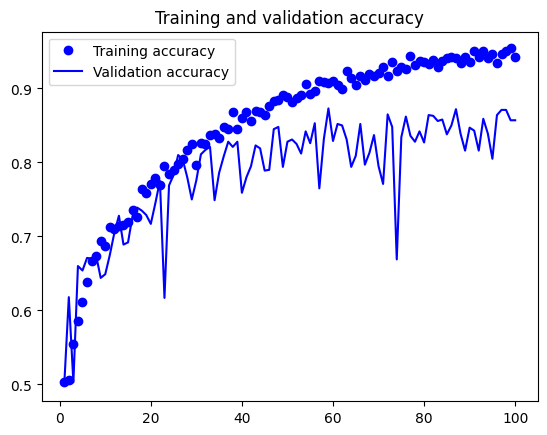

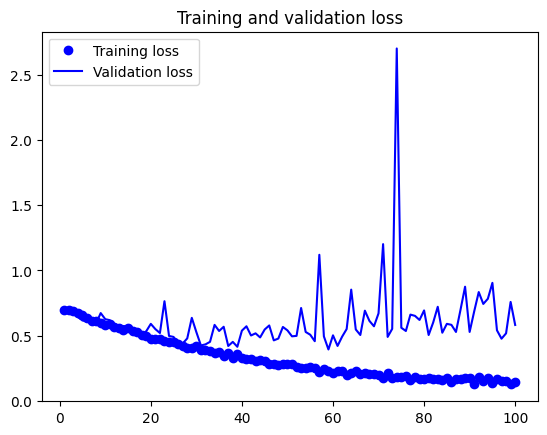

In [40]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Evaluating the model on the test set
    </font>
</div>

In [41]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8457 - loss: 0.4880
Test accuracy: 0.846


# **5-Leveraging a pretrained model**

## **5-1-Feature extraction with a pretrained model**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Instantiating the VGG16 convolutional base
    </font>
</div>

In [42]:
conv_base = VGG16(weights="imagenet", include_top=False,input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [43]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

## **5-2-Fast feature extraction without data augmentation**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Extracting the VGG16 features and corresponding labels
    </font>
</div>

In [44]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

In [45]:
train_features.shape

(2000, 5, 5, 512)

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Defining and training the densely connected classifier
    </font>
</div>

In [46]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.8679 - loss: 34.3648 - val_accuracy: 0.9150 - val_loss: 16.4982
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9715 - loss: 4.5863 - val_accuracy: 0.9620 - val_loss: 8.1034
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9831 - loss: 3.1383 - val_accuracy: 0.9810 - val_loss: 3.5535
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9918 - loss: 0.9187 - val_accuracy: 0.9780 - val_loss: 4.8173
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9861 - loss: 1.2874 - val_accuracy: 0.9800 - val_loss: 4.3696
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.1570 - val_accuracy: 0.9620 - val_loss: 10.4094
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.3888 - val_accuracy: 0.9770 - val_loss: 4.7238
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.0304 - val_accuracy: 0.9690 - val_l

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Plotting the results
    </font>
</div>

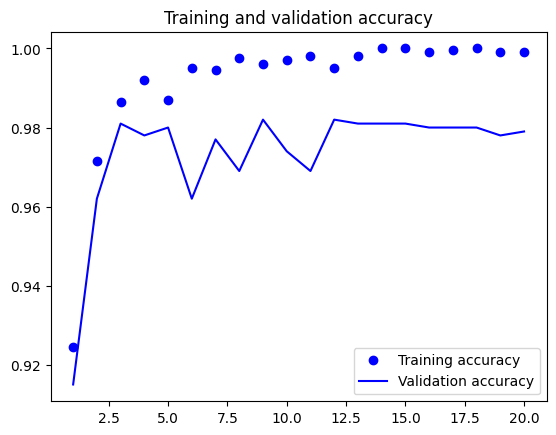

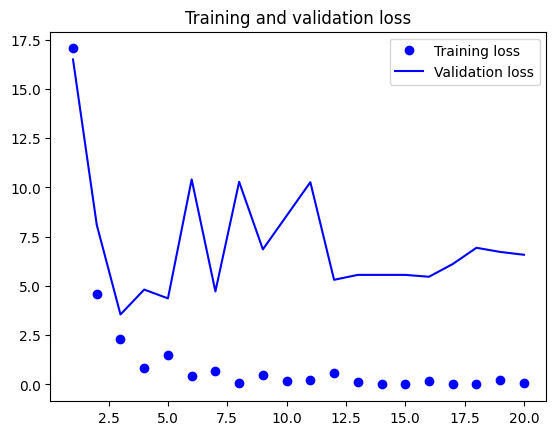

In [47]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## **5-3-Feature extraction together with data augmentation**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Instantiating and freezing the VGG16 convolutional base
    </font>
</div>

In [48]:
conv_base  = VGG16(weights="imagenet", include_top=False) 
conv_base.trainable = False

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Printing the list of trainable weights before and after freezing
    </font>
</div>

In [49]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Adding a data augmentation stage and a classifier to the convolutional base
    </font>
</div>

In [50]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [51]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 475ms/step - accuracy: 0.4996 - loss: 32385.1953 - val_accuracy: 0.5720 - val_loss: 0.6834
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 359ms/step - accuracy: 0.4918 - loss: 0.7092 - val_accuracy: 0.5480 - val_loss: 0.6863
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 356ms/step - accuracy: 0.5034 - loss: 1.9809 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 362ms/step - accuracy: 0.4848 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 362ms/step - accuracy: 0.4917 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 353ms/step - accuracy: 0.5169 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 354ms/step - accuracy: 0.4805 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 358ms/step - accuracy: 0.4827 - loss: 0.6936 - val_

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Evaluating the model on the test set
    </font>
</div>

In [52]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.5446 - loss: 0.6868
Test accuracy: 0.543


## **5-4-Fine-tuning a pretrained model**

In [53]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Freezing all layers until the fourth from the last
    </font>
</div>

In [54]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Fine-tuning the model
    </font>
</div>

In [55]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 197ms/step - accuracy: 0.4902 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.4983 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - accuracy: 0.4920 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - accuracy: 0.5104 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 190ms/step - accuracy: 0.4656 - loss: 0.6937 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - accuracy: 0.5114 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.5062 - loss: 0.6931 - val_accu

In [56]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.5092 - loss: 0.6931
Test accuracy: 0.500
